In [1]:
# https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br
# https://github.com/zalandoresearch/fashion-mnist

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# os nomes das classes não são incluídas na base de dados. O array abaixo contem o nome das classes.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
# Quantidade de pixels de uma imagem
train_images[0,:,:].shape

(28, 28)

In [10]:
# exindo os pixels em valores numéricos, de apenas uma imagem
index_exibir = 0
train_images[index_exibir,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

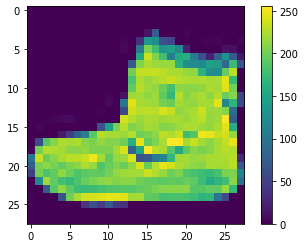

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Para treinar a rede, os dados precisam ter valores entre 0~1. Converter os os valores 0~255 em valores 0~1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [13]:
train_images[index_exibir,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

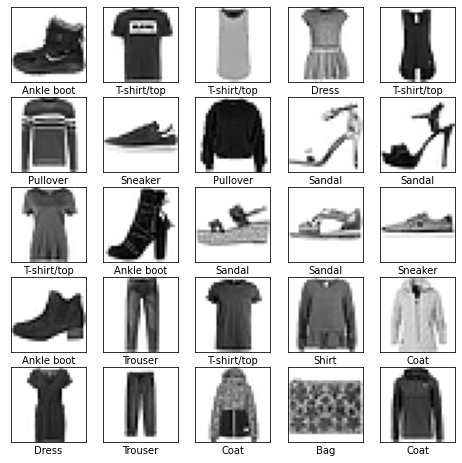

In [14]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    #plt.xlabel(train_labels[i])
plt.show()


In [15]:
# construindo o modelo
# Flatten --> converte a matriz 28x28 em um array de 784
# Relu --> camada de ativação com 128 'neuronios'
# Softmax --> define as possiveis 10 classificações

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
# loss --> o quao preciso é o modelo (o objetivo é minimizar esse valor)
# accuracy --> precisão 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy']
             )


In [17]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6027 - accuracy: 0.7880
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3704 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3253 - accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8894
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8950: 0s - loss: 0.2806 - 
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.8989: 0s - loss: 0.271
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2644 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2404 - accuracy: 0.9091
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2312 - accuracy: 0.9123
Epoch 10/10
1875/1875 [===================

In [18]:
# avaliando a acurácia

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print(test_acc)


313/313 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8862
0.8862000107765198


In [19]:
## Se a acurácia com o conjunto de teste é menor do que a acurácia de treinamento ==> overfiting
## Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, 
## e não usadas anteriormente, que usando o conjunto de treinamento.

In [20]:
predictions = model.predict(test_images)


In [21]:
p_index = 2
p = predictions[p_index]
p

array([1.14420105e-11, 1.00000000e+00, 2.36074620e-16, 2.73058881e-10,
       2.88564040e-13, 1.07120031e-21, 3.50289811e-13, 3.19215004e-29,
       1.82816815e-13, 3.62706473e-26], dtype=float32)

In [22]:
pclass = np.argmax(p)
pclass

1

In [23]:
class_names[pclass]

'Trouser'

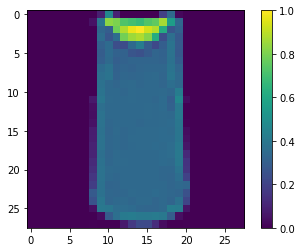

In [24]:
plt.figure()
plt.imshow(train_images[p_index])
plt.colorbar()
plt.grid(False)
plt.show()